In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [3]:
from models.LearningAlgorithms import ClassificationAlgorithms

In [4]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [5]:
# Loading the data

df = pd.read_pickle("../data/interim/03_data_features.pkl")
df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,30,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,30,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,30,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,30,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,30,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,90,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,90,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,90,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [6]:
# Creating the training and testind df

df_train = df.drop(["participant", "category", "set", "duration"], axis=1)
df_train

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,pca_1,pca_2,pca_3,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,0.311963,-0.167364,-0.013911,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,0.279209,-0.079385,0.045996,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,0.328399,-0.066606,0.032153,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,0.318289,-0.066734,0.040494,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,0.298084,-0.079820,0.046036,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,-0.349738,-0.028197,-0.069053,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,-0.419648,-0.179453,-0.048139,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,-0.349351,-0.148450,-0.053031,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [7]:
X = df_train.drop(["label"], axis = 1)
y = df_train["label"]

In [8]:
X

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,pca_1,pca_2,pca_3,acc_r,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,0.311963,-0.167364,-0.013911,0.940455,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,0.279209,-0.079385,0.045996,0.862867,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,0.328399,-0.066606,0.032153,0.999635,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,0.318289,-0.066734,0.040494,0.973592,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,0.298084,-0.079820,0.046036,0.914173,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,-0.349738,-0.028197,-0.069053,0.960312,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,-0.419648,-0.179453,-0.048139,1.198556,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,-0.349351,-0.148450,-0.053031,0.991076,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [9]:
y

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:08.400    bench
2019-01-11 15:08:08.800    bench
2019-01-11 15:08:09.200    bench
2019-01-11 15:08:09.600    bench
                           ...  
2019-01-20 17:33:26.200      row
2019-01-20 17:33:26.600      row
2019-01-20 17:33:27.000      row
2019-01-20 17:33:27.400      row
2019-01-20 17:33:27.800      row
Name: label, Length: 3868, dtype: object

In [10]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

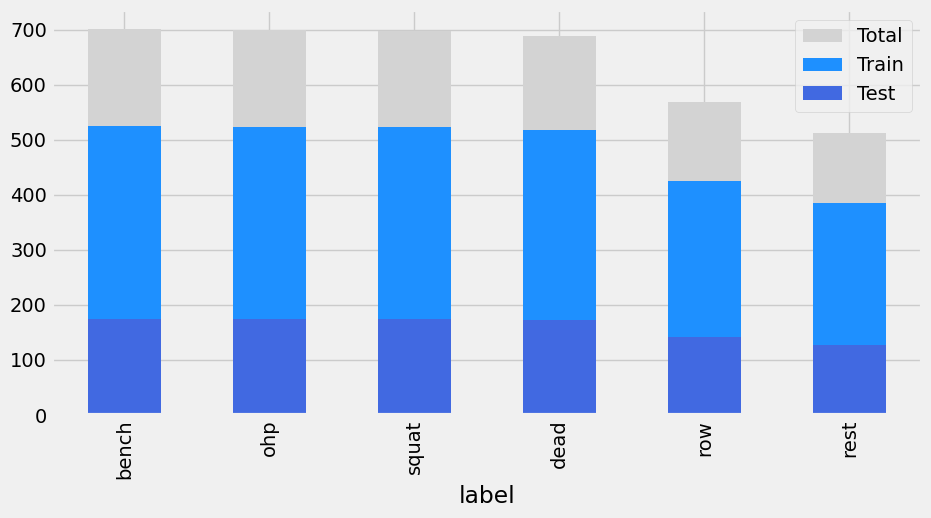

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind = "bar",ax = ax,color = "lightgrey",label = "Total")
y_train.value_counts().plot(kind = "bar", ax = ax, color = "dodgerblue", label = "Train")
y_test.value_counts().plot(kind = "bar", ax = ax, color = "royalblue", label = "Test")

plt.legend()
plt.show()

In [12]:
# Split feature Subset

basic_features = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]
square_features = ["acc_r", "gyro_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
frequency_features = [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

In [13]:
print(f"Basic Features: {len(basic_features)}")
print(f"Square Features: {len(square_features)}")
print(f"PCA Features: {len(pca_features)}")
print(f"Time Features: {len(time_features)}")
print(f"Freq Features: {len(frequency_features)}")
print(f"cluster_features: {len(cluster_features)}")

Basic Features: 6
Square Features: 2
PCA Features: 3
Time Features: 16
Freq Features: 88
cluster_features: 1


In [14]:
# Creating feature sets

feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

In [15]:
feature_set_4

['gyro_x_temp_mean_ws_5',
 'acc_x',
 'gyro_r_freq_0.0_Hz_ws_14',
 'gyro_y_freq_1.071_Hz_ws_14',
 'gyro_x_max_freq',
 'gyro_y_temp_std_ws_5',
 'acc_r_freq_1.786_Hz_ws_14',
 'gyro_y_freq_0.0_Hz_ws_14',
 'gyro_z_freq_0.714_Hz_ws_14',
 'acc_y',
 'gyro_r_temp_std_ws_5',
 'acc_z_freq_1.429_Hz_ws_14',
 'acc_y_freq_weighted',
 'acc_x_pse',
 'acc_z_freq_1.071_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyro_z_freq_1.786_Hz_ws_14',
 'gyro_x_freq_0.714_Hz_ws_14',
 'cluster',
 'gyro_y_max_freq',
 'acc_z_freq_1.786_Hz_ws_14',
 'gyro_z_freq_1.429_Hz_ws_14',
 'gyro_x_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'acc_x_temp_mean_ws_5',
 'acc_y_freq_1.786_Hz_ws_14',
 'acc_z_freq_0.714_Hz_ws_14',
 'gyro_r_freq_0.357_Hz_ws_14',
 'gyro_y_freq_0.714_Hz_ws_14',
 'acc_r',
 'acc_z',
 'acc_r_freq_0.714_Hz_ws_14',
 'gyro_r_freq_1.071_Hz_ws_14',
 'acc_y_freq_0.0_Hz_ws_14',
 'acc_r_freq_1.071_Hz_ws_14',
 'acc_y_freq_0.714_Hz_ws_14',
 'gyro_z_freq_weighted',
 'gyro_y_freq_weighted',
 'acc_z_temp_mean_ws_5',
 'a

In [16]:
# Perform forward feature selection using simple Decision Trees
learner = ClassificationAlgorithms()

max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(max_features, X_train, y_train)

0


f:\pythoncode\ML\ML Projects\Fitness-tracker-ML\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


1
2
3
4
5
6
7
8
9


In [17]:
ordered_scores

[0.8872802481902792,
 0.9651844191658049,
 0.9927611168562565,
 0.9979317476732161,
 0.9989658738366081,
 0.9989658738366081,
 0.9989658738366081,
 0.9993105825577387,
 0.9993105825577387,
 0.9993105825577387]

In [18]:
ordered_features

['pca_1',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_x_freq_0.0_Hz_ws_14',
 'gyro_r_freq_0.0_Hz_ws_14',
 'gyro_z_freq_weighted',
 'acc_x_max_freq',
 'acc_x',
 'acc_x_freq_1.429_Hz_ws_14',
 'gyro_y_freq_1.071_Hz_ws_14',
 'gyro_y']

In [19]:
selected_features = [
    'pca_1',
    'acc_z_freq_0.0_Hz_ws_14',
    'acc_x_freq_0.0_Hz_ws_14',
    'gyro_r_freq_0.0_Hz_ws_14',
    'acc_x_freq_0.357_Hz_ws_14',
    'acc_r_freq_0.357_Hz_ws_14',
    'gyro_y',
    'acc_x_max_freq',
    'gyro_y_freq_2.143_Hz_ws_14',
    'gyro_r_freq_1.071_Hz_ws_14'
]

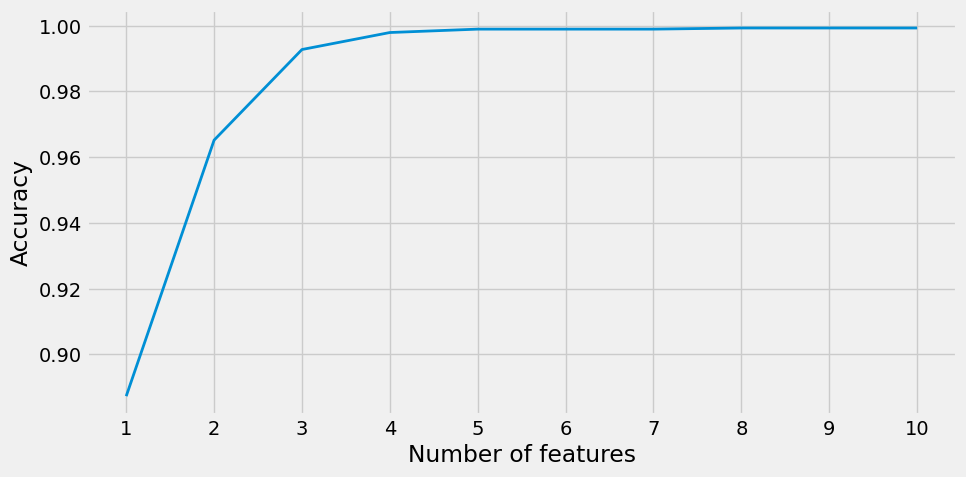

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features+1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features+1, 1))
plt.show()

In [21]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features"
]

In [22]:
# Using Grid Search
iterations = 1
score_df = pd.DataFrame()


for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0


f:\pythoncode\ML\ML Projects\Fitness-tracker-ML\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [23]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.934850
1,RF,Feature Set 1,0.954498
2,KNN,Feature Set 1,0.803516
3,DT,Feature Set 1,0.932782
4,NB,Feature Set 1,0.854188
0,NN,Feature Set 2,0.932782
1,RF,Feature Set 2,0.956567
2,KNN,Feature Set 2,0.800414
3,DT,Feature Set 2,0.933816
4,NB,Feature Set 2,0.859359


In [24]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,Feature Set 4,0.995863
0,NN,Feature Set 4,0.993795
0,NN,Feature Set 3,0.989659
1,RF,Selected Features,0.988625
3,DT,Feature Set 4,0.983454
3,DT,Selected Features,0.981386
0,NN,Selected Features,0.980352
1,RF,Feature Set 3,0.980352
2,KNN,Feature Set 4,0.968976
3,DT,Feature Set 3,0.958635


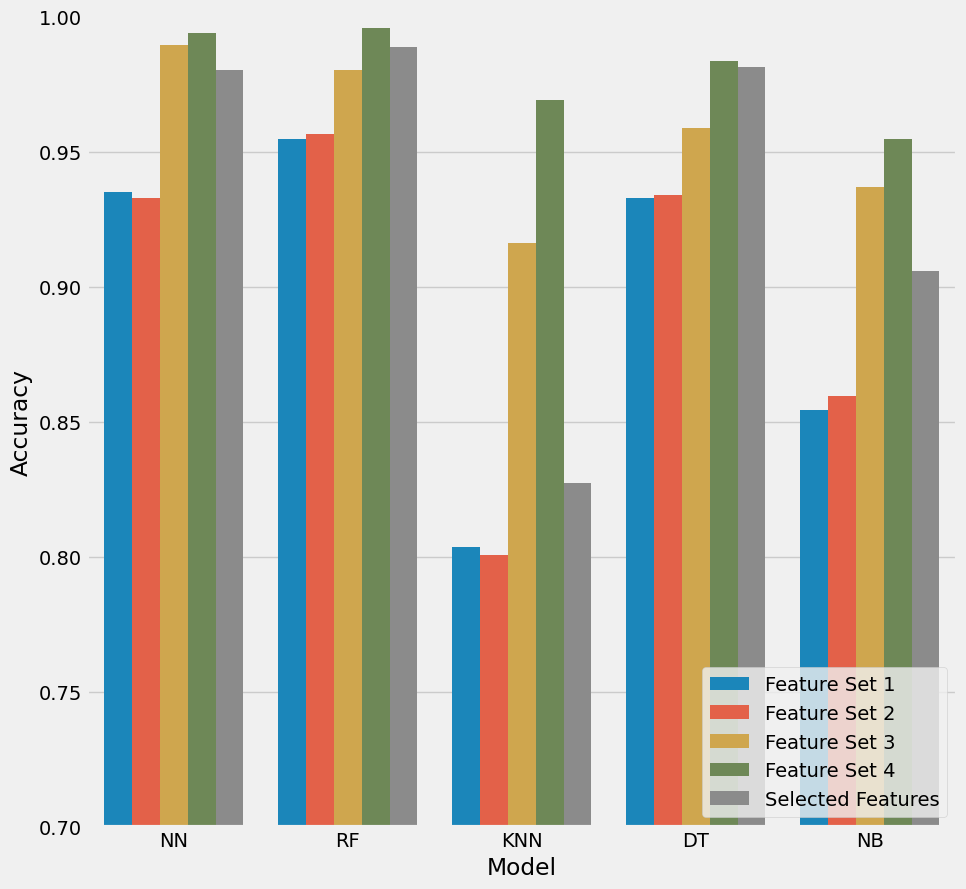

In [25]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue = "feature_set", data = score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

In [31]:
# Since our best performing model is Random Forest, we will train our dataset one more time with
# Forest

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True)

In [34]:
accuracy = accuracy_score(y_test, class_test_y)
accuracy

0.9937952430196484

In [35]:
classes = class_test_prob_y.columns
classes

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

In [37]:
# Confusion matrix

cm = confusion_matrix(y_test, class_test_y, labels = classes)
cm

array([[174,   0,   1,   0,   0,   0],
       [  0, 171,   0,   0,   1,   0],
       [  1,   0, 174,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   3,   0,   0, 139,   0],
       [  0,   0,   0,   0,   0, 175]])

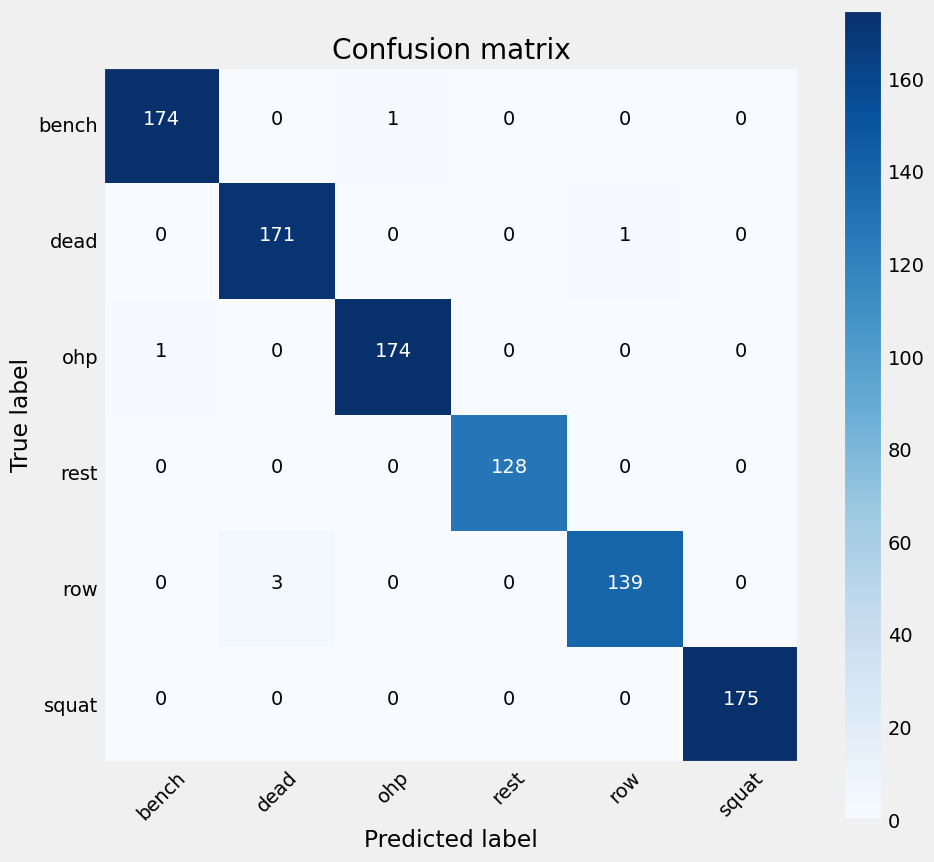

In [38]:
# Visualization of the confusion matrix

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [41]:
# Spliting the data based on Participants

participant_df = df.drop(["duration", "set", "category"], axis=1)
participant_df

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,pca_1,pca_2,...,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_14,gyro_r_freq_0.357_Hz_ws_14,gyro_r_freq_0.714_Hz_ws_14,gyro_r_freq_1.071_Hz_ws_14,gyro_r_freq_1.429_Hz_ws_14,gyro_r_freq_1.786_Hz_ws_14,gyro_r_freq_2.143_Hz_ws_14,gyro_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,0.311963,-0.167364,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,0.279209,-0.079385,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,0.328399,-0.066606,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,0.318289,-0.066734,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,0.298084,-0.079820,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,-0.349738,-0.028197,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,-0.419648,-0.179453,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,-0.349351,-0.148450,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [42]:
X_train = participant_df[participant_df["participant"] != "A"].drop("label", axis=1)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

X_test = participant_df[participant_df["participant"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

In [43]:
X_train = X_train.drop("participant", axis=1)
X_test = X_test.drop("participant", axis=1)

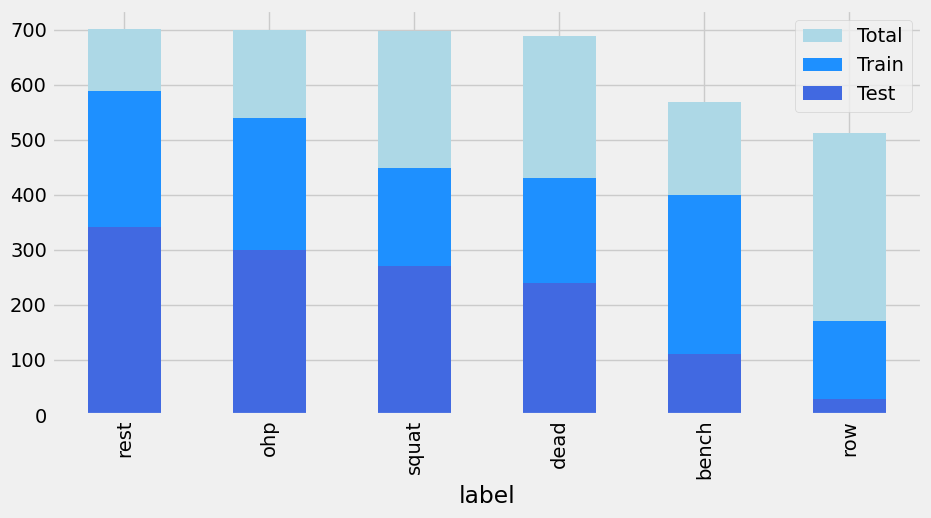

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(
    kind="bar",
    color="lightblue",
    ax=ax,
    label = "Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color ="dodgerblue", label = "Train")
y_test.value_counts().plot(kind="bar", ax=ax, color ="royalblue", label = "Test")

plt.legend()
plt.show()

In [49]:
# Again training the model based on the participant split
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True)

In [50]:
accuracy = accuracy_score(y_test, class_test_y)
accuracy

0.9907120743034056

In [53]:
classes = class_test_prob_y.columns
classes

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

In [54]:
cm = confusion_matrix(y_test, class_test_y, labels = classes)
cm

array([[111,   0,   0,   0,   0,   0],
       [  0, 237,   0,   0,   3,   0],
       [  5,   0, 294,   0,   0,   0],
       [  0,   0,   4, 338,   0,   0],
       [  0,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   0, 271]])

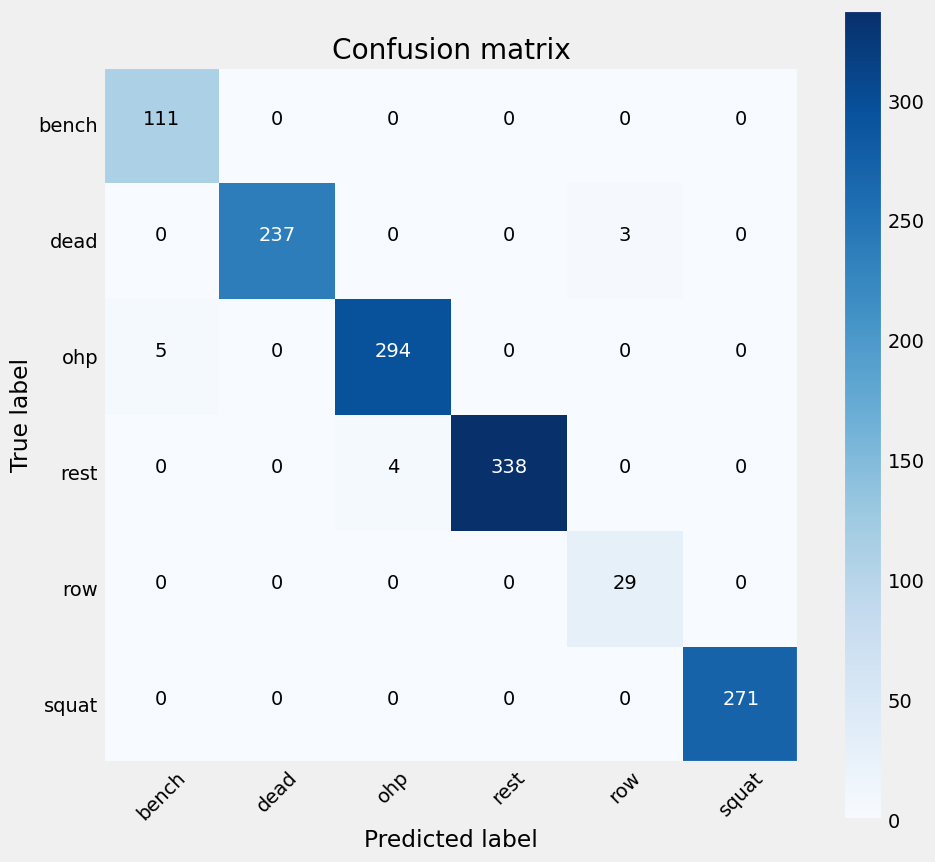

In [55]:
# Visualization of the confusion matrix

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [77]:
# Trying NeuralNetwork model, but with selected features

class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=False)

In [78]:
accuracy = accuracy_score(y_test, class_test_y)
accuracy

0.9961300309597523

In [79]:
classes = class_test_prob_y.columns
classes

Index(['bench', 'dead', 'ohp', 'rest', 'row', 'squat'], dtype='object')

In [80]:
cm = confusion_matrix(y_test, class_test_y, labels = classes)
cm

array([[111,   0,   0,   0,   0,   0],
       [  0, 238,   0,   0,   2,   0],
       [  3,   0, 296,   0,   0,   0],
       [  0,   0,   0, 342,   0,   0],
       [  0,   0,   0,   0,  29,   0],
       [  0,   0,   0,   0,   0, 271]])

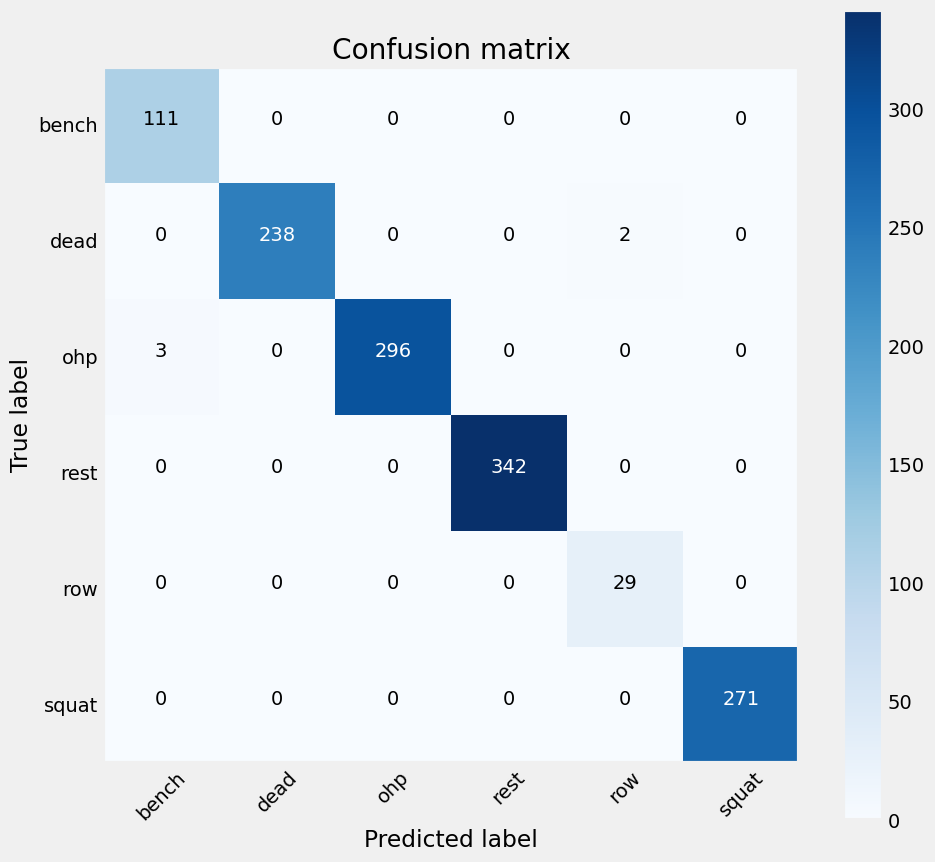

In [81]:
# Visualization of the confusion matrix

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()